In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
speeches = pd.read_parquet('src/Data/ecb-speeches.parquet')
releases = pd.read_csv("src/Data/ecb_releases_302.csv")
announcements = pd.read_csv("src/Data/policy_announcements.csv")

In [4]:
speeches

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,1998-10-12,Mr. Duisenberg speaks on changes in European f...
3,1998-10-12,Mr. Duisenberg's statement to the European Par...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
...,...,...
2250,2022-02-15,Christine Lagarde: 20th anniversary of the ent...
2251,2022-02-17,Christine Lagarde: Introductory statement - Eu...
2252,2022-02-23,Frank Elderson: Prudential pathways to Paris C...
2253,2022-02-23,Frank Elderson: Towards an immersive superviso...


In [51]:
# Set the path to the output CSV file
output_file = os.path.join('src', 'output', 'data.csv')

# Save the DataFrame to a CSV file
df_speeches.to_csv(output_file, index=False)


In [161]:
# Set the path to the input CSV file
input_file = os.path.join('src', 'output', 'data.csv')

# Read the CSV file into a DataFrame
df_speeches = pd.read_csv(input_file)

# Display the first 20 rows of the DataFrame
df_speeches

,date,content,cleaned_content,content_cleaned
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,mr duisenberg reports on the outcome of the se...,mr duisenberg reports on the outcome of the se...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...,mr duisenbergs opening statement at the meetin...,mr duisenbergs opening statement at the meetin...
2,1998-10-12,Mr. Duisenberg's statement to the European Par...,mr duisenbergs statement to the european parli...,mr duisenbergs statement to the european parli...
3,1998-10-12,Mr. Duisenberg speaks on changes in European f...,mr duisenberg speaks on changes in european fi...,mr duisenberg speaks on changes in european fi...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...,mr duisenbergs opening statement at the press ...,mr duisenbergs opening statement at the press ...
...,...,...,...,...
2270,2022-02-18,012234\n\n56789 6ÿ6ÿÿ69ÿ96ÿÿ...,\n\n yyyyyy\n\ny...,\n\n yyyyyy \n\n y...
2271,2022-02-23,Frank Elderson: Towards an immersive superviso...,frank elderson towards an immersive supervisor...,frank elderson towards an immersive supervisor...
2272,2022-02-23,,,
2273,2022-02-23,Frank Elderson: Prudential pathways to Paris\n...,frank elderson prudential pathways to paris\nc...,frank elderson prudential pathways to paris \n...


In [55]:
def consolidate_lines(df):
    """
    Consolidate lines in the content of a dataframe. 
    If a line does not end with a full stop, it is merged 
    with the next line, removing unnecessary newline characters.
    
    Args:
        df (pandas.DataFrame): Dataframe with 'content' column
    
    Returns:
        pandas.DataFrame: Modified dataframe with consolidated lines
    """
    consolidated_data = []

    for index, row in df.iterrows():
        content = row['content']
        lines = content.split('\n')
        consolidated_content = ""
        for i, line in enumerate(lines):
            line = line.strip()
            if line and (line[-1] in ".!?" or i == len(lines) - 1):
                consolidated_content += line + " "
            else:
                consolidated_content += line

        consolidated_row = row.copy()
        consolidated_row['content'] = consolidated_content.strip()
        consolidated_data.append(consolidated_row)

    # Create new dataframe with consolidated content
    new_df = pd.DataFrame(consolidated_data)

    return new_df


In [56]:
import re

def split_paragraphs(df):
    """
    Splits content of dataframe into separate rows. 
    If a paragraph exceeds 512 words, it is limited to 
    two nearly equal parts, with the split done at a full stop.
    
    Args:
        df (pandas.DataFrame): Dataframe with 'date' and 'content' columns
    
    Returns:
        pandas.DataFrame: Modified dataframe with split content
    """
    data = []

    for index, row in df.iterrows():
        date = row['date']
        content = row['content']

        # Split content into sentences
        sentences = re.split(r'(?<=[.!?])\s+', content)

        # Process each sentence
        current_part = ""
        for sentence in sentences:
            if len(current_part.split()) + len(sentence.split()) <= 50:
                current_part += " " + sentence
            else:
                if current_part.strip():
                    data.append([date, current_part.strip()])
                current_part = sentence

        # Append remaining part if exists
        if current_part.strip():
            data.append([date, current_part.strip()])

    # Create new dataframe
    new_df = pd.DataFrame(data, columns=['date', 'content'])

    return new_df


In [57]:
df_speeches_consolidated = consolidate_lines(df_speeches)
df_speeches_consolidated = split_paragraphs(df_speeches_consolidated)
df_speeches_consolidated

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-07-17,The general picture is one of continued econom...
2,1998-07-17,"As far as pricedevelopments are concerned, inf..."
3,1998-07-17,Economic growth has been driven increasingly b...
4,1998-07-17,The favourable conjunctural situation has star...
...,...,...
147049,2022-02-25,"Based on its experience, the ECB would strongl..."
147050,2022-02-25,"Also, considering the strict, risk-based natur..."
147051,2022-02-25,The most prominent element of the ECB opinions...
147052,2022-02-25,"While the proposed limit of €10,000 euro does ..."


In [58]:

df_speeches_consolidated.to_csv('df_speeches_consolidated.csv', index=False)
df_speeches_consolidated.head()

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-07-17,The general picture is one of continued econom...
2,1998-07-17,"As far as pricedevelopments are concerned, inf..."
3,1998-07-17,Economic growth has been driven increasingly b...
4,1998-07-17,The favourable conjunctural situation has star...


In [59]:
# create counts column that counts words in content column of each row
df_speeches_consolidated['counts'] = df_speeches_consolidated['content'].str.split().str.len()
df_speeches_consolidated

,date,content,counts
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,50
1,1998-07-17,The general picture is one of continued econom...,34
2,1998-07-17,"As far as pricedevelopments are concerned, inf...",49
3,1998-07-17,Economic growth has been driven increasingly b...,35
4,1998-07-17,The favourable conjunctural situation has star...,49
...,...,...,...
147049,2022-02-25,"Based on its experience, the ECB would strongl...",45
147050,2022-02-25,"Also, considering the strict, risk-based natur...",53
147051,2022-02-25,The most prominent element of the ECB opinions...,17
147052,2022-02-25,"While the proposed limit of €10,000 euro does ...",44


In [60]:
# remove observations with missing values and counts of less than 50
df_speeches_consolidated = df_speeches_consolidated[(df_speeches_consolidated['counts']>=20) & (df_speeches_consolidated['counts']<200) ]
df_speeches_consolidated

,date,content,counts
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,50
1,1998-07-17,The general picture is one of continued econom...,34
2,1998-07-17,"As far as pricedevelopments are concerned, inf...",49
3,1998-07-17,Economic growth has been driven increasingly b...,35
4,1998-07-17,The favourable conjunctural situation has star...,49
...,...,...,...
147048,2022-02-25,I would like to highlight that the criteria fo...,40
147049,2022-02-25,"Based on its experience, the ECB would strongl...",45
147050,2022-02-25,"Also, considering the strict, risk-based natur...",53
147052,2022-02-25,"While the proposed limit of €10,000 euro does ...",44


In [61]:
from transformers import AutoTokenizer

# Define the tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [62]:
import nltk
nltk.download('punkt')
from transformers import pipeline

[nltk_data] Downloading package punkt to /home/ozodbek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
import transformers

classifier = pipeline(
    "text-classification",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased",
)


## Save part of the data for labeling


In [152]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into labeled and unlabeled portions
labeled, _ = train_test_split(df_speeches_consolidated, test_size=0.9, random_state=42)

# Save the labeled samples to a CSV file
labeled.to_csv('for_labeling.csv', index=False)

# Display the first few rows of the labeled DataFrame
print(labeled.head())


             date                                            content  counts
54065  2017-10-16  A central bank canseek to influence the level ...     100
39691  2014-01-31  Looking beyond the crisis: a broader political...      88
55284  2018-02-06  First, finalising the banking reform package i...      73
31411  2011-10-21  The ECB Governing Council isproviding a very s...      82
30597  2011-08-29  For the euro area it is very common to look at...      97


In [153]:
labeled

,date,content,counts
54065,2017-10-16,A central bank canseek to influence the level ...,100
39691,2014-01-31,Looking beyond the crisis: a broader political...,88
55284,2018-02-06,"First, finalising the banking reform package i...",73
31411,2011-10-21,The ECB Governing Council isproviding a very s...,82
30597,2011-08-29,For the euro area it is very common to look at...,97
...,...,...,...
37318,2013-06-25,Thereare four broad arguments which I would li...,82
6278,2004-04-28,"Currently, thisframework relies largely on a p...",91
55089,2018-01-25,In order to reap the full benefits from our mo...,92
861,1999-06-09,"Notes and coin issued by the central bank and,...",95


## functional way

In [11]:
max_chunk_length = 512


In [65]:
import pandas as pd
from functions import calculate_sentiment_distilbert

# Create an empty DataFrame
df = pd.DataFrame()

# Apply the sentiment analysis function to the 'content' column for the first 10 rows
df[['positive', 'negative']] = df_speeches_consolidated['content'].head(10).apply(
    lambda x: pd.Series(calculate_sentiment_distilbert(x))
)
# Print the updated DataFrame
print(df)


   positive  negative
0  0.988099  0.011901
1  0.960844  0.039156
2  0.997458  0.002542
3  0.787363  0.212637
4  0.815906  0.184094
5  0.687710  0.312290
6  0.531834  0.468166
7  0.998245  0.001755
8  0.928188  0.071812
9  0.995707  0.004293


In [112]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-31'

# Filter the DataFrame based on the date range
subset_df = df_speeches_consolidated[(df_speeches_consolidated['date'] >= start_date) & (df_speeches_consolidated['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))

# Print the updated subset DataFrame
print(subset_df)


             date                                            content  counts  \
17589  2008-09-03  Gertrude Tumpel-Gugerell: Start of the ECB/ESC...      70   
17590  2008-09-03  ***Mr Radovan Jelašić, Governor of the Nationa...      75   
17591  2008-09-03  I would like to express my gratitude to the Eu...      81   
17592  2008-09-03  Later during this press conference I willconfi...      93   
17593  2008-09-03  In order to achieve our common mandates of low...      99   
...           ...                                                ...     ...   
18273  2008-09-30  Second, and to turn to the beginning of my rem...      99   
18274  2008-09-30  At the same time, theflexibility of the ECB’s ...      95   
18275  2008-09-30  Scheicher (2008): “AResearch perspective on th...      76   
18276  2008-09-30  I strongly believe that especially at times of...      88   
18277  2008-09-30  This will verymuch depend on the ability of al...      59   

                                       

/tmp/ipykernel_6060/2744381917.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))
/tmp/ipykernel_6060/2744381917.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))


In [130]:
subset_df

,date,content,counts,tokenized_text,input_tensors,token_size,tensor_size,positive,negative
17589,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,70,"[gertrude, tu, ##mp, ##el, -, gu, ##ger, ##ell...","[[tensor(101), tensor(18734), tensor(10722), t...",107,"(1, 109)",0.727223,0.272777
17590,2008-09-03,"***Mr Radovan Jelašić, Governor of the Nationa...",75,"[*, *, *, mr, ra, ##do, ##van, je, ##las, ##ic...","[[tensor(101), tensor(1008), tensor(1008), ten...",107,"(1, 109)",0.999722,0.000278
17591,2008-09-03,I would like to express my gratitude to the Eu...,81,"[i, would, like, to, express, my, gratitude, t...","[[tensor(101), tensor(1045), tensor(2052), ten...",101,"(1, 103)",0.997560,0.002440
17592,2008-09-03,Later during this press conference I willconfi...,93,"[later, during, this, press, conference, i, wi...","[[tensor(101), tensor(2101), tensor(2076), ten...",116,"(1, 118)",0.997701,0.002299
17593,2008-09-03,In order to achieve our common mandates of low...,99,"[in, order, to, achieve, our, common, mandates...","[[tensor(101), tensor(1999), tensor(2344), ten...",127,"(1, 129)",0.987333,0.012667
...,...,...,...,...,...,...,...,...,...
18273,2008-09-30,"Second, and to turn to the beginning of my rem...",99,"[second, ,, and, to, turn, to, the, beginning,...","[[tensor(101), tensor(2117), tensor(1010), ten...",131,"(1, 133)",0.998247,0.001753
18274,2008-09-30,"At the same time, theflexibility of the ECB’s ...",95,"[at, the, same, time, ,, the, ##fle, ##xi, ##b...","[[tensor(101), tensor(2012), tensor(1996), ten...",142,"(1, 144)",0.988739,0.011261
18275,2008-09-30,Scheicher (2008): “AResearch perspective on th...,76,"[sc, ##hei, ##cher, (, 2008, ), :, “, ares, ##...","[[tensor(101), tensor(8040), tensor(26036), te...",127,"(1, 129)",0.603886,0.396114
18276,2008-09-30,I strongly believe that especially at times of...,88,"[i, strongly, believe, that, especially, at, t...","[[tensor(101), tensor(1045), tensor(6118), ten...",115,"(1, 117)",0.858888,0.141112


# Get started with FinBERT

In [131]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [132]:
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')


In [133]:
from functions import split_text
from functions import calculate_sentiment_finbert

In [134]:
# Apply the sentiment analysis function to the 'content' column for the first N rows

N=2
subset = df_speeches_consolidated.head(N)
subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset['neutral'] = 1 - subset['positive'] - subset['negative']

/tmp/ipykernel_6060/400877338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_6060/400877338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_6060/400877338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [135]:
# Print the updated DataFrame
subset.head(2)

,date,content,counts,positive,negative,neutral
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,84,0.141178,0.101129,0.757693
1,1998-07-17,"As far as pricedevelopments are concerned, inf...",84,0.137867,0.843529,0.018605


In [136]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-31'

# Filter the DataFrame based on the date range
subset_df = df_speeches_consolidated[(df_speeches_consolidated['date'] >= start_date) & (df_speeches_consolidated['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset_df['neutral'] = 1 - subset_df['positive'] - subset_df['negative']

# Print the updated subset DataFrame
subset_df


/tmp/ipykernel_6060/76287949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_6060/76287949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_6060/76287949.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,date,content,counts,positive,negative,neutral
17589,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,70,0.899084,0.088052,0.012864
17590,2008-09-03,"***Mr Radovan Jelašić, Governor of the Nationa...",75,0.437999,0.551213,0.010788
17591,2008-09-03,I would like to express my gratitude to the Eu...,81,0.222247,0.768317,0.009436
17592,2008-09-03,Later during this press conference I willconfi...,93,0.612339,0.377583,0.010078
17593,2008-09-03,In order to achieve our common mandates of low...,99,0.805742,0.184133,0.010125
...,...,...,...,...,...,...
18273,2008-09-30,"Second, and to turn to the beginning of my rem...",99,0.201129,0.032508,0.766363
18274,2008-09-30,"At the same time, theflexibility of the ECB’s ...",95,0.884685,0.096530,0.018786
18275,2008-09-30,Scheicher (2008): “AResearch perspective on th...,76,0.645142,0.342269,0.012589
18276,2008-09-30,I strongly believe that especially at times of...,88,0.352219,0.516016,0.131764


# 

In [20]:
# save the data in parquet format
subset_df.to_parquet('src/output/finbert_sentiment_test.parquet')

In [21]:
subset_df = pd.read_parquet('src/output/finbert_sentiment_test.parquet')
subset_df

,date,content,positive,negative,neutral
544,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,0.584601,0.402499,0.012901
545,2008-09-04,Gertrude Tumpel-Gugerell: Moving ahead with th...,0.710431,0.173809,0.115760
546,2008-09-09,Jean-Claude Trichet: Risk and the macro-econom...,0.593253,0.148920,0.257826
547,2008-09-09,European Central Bank: Press conference – intr...,0.262152,0.380591,0.357257
548,2008-09-09,Jürgen Stark: Monetary policy during the finan...,0.663428,0.230403,0.106169
549,2008-09-09,"José Manuel González-Páramo: Globalisation, ma...",0.558848,0.297435,0.143717
550,2008-09-10,Jürgen Stark: Economic perspectives and moneta...,0.405998,0.265484,0.328518
551,2008-09-10,Gertrude Tumpel-Gugerell: What is the role of ...,0.764259,0.216999,0.018742
552,2008-09-11,José Manuel González-Páramo: Some lessons from...,0.547132,0.318116,0.134752
553,2008-09-11,Jean Claude-Trichet: Hearing before the Econom...,0.464297,0.294642,0.241061


In [22]:
### sentiment probabilities are different each time the function is run


# Topic modeling


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [24]:
# load the data and convert the content column to list
df_topic = pd.read_parquet('src/output/finbert_sentiment_test.parquet')
subset = df_topic.head(10)
documents = subset['content'].tolist()


In [25]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(documents)

In [26]:
df

,positive,negative,neutral
0,0.935110,0.064890,0.0
1,0.904324,0.095676,0.0
2,0.956236,0.043764,0.0
3,0.906362,0.093638,0.0
4,0.914322,0.085678,0.0
5,0.900807,0.099193,0.0
6,0.946191,0.053809,0.0
7,0.973710,0.026290,0.0
8,0.941357,0.058643,0.0
9,0.961934,0.038066,0.0


In [27]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

data = df_topic.head(10)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)

# Apply TF-IDF vectorization to the documents
tfidf_matrix = vectorizer.fit_transform(data['content'])

# Apply LSA (Truncated SVD)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the feature names (i.e., the terms) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# For each topic, print the top words
for topic_idx, topic in enumerate(lsa_model.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(", ".join(top_words))
    print()


Topic 1:
council, governing, growth, banknotes, strategy, today, reserve, press, report, january

Topic 2:
role, international, strategy, assets, development, objective, possible, reserve, value, systems

Topic 3:
reserve, systems, assets, credit, operations, securities, contribute, payment, liquidity, framework

Topic 4:
role, international, emi, report, council, procedures, work, strategy, agreement, instruments

Topic 5:
problems, january, target, today, day, confidence, december, changeover, longer, role

Topic 6:
eu, foreign, role, adopted, governing, international, reserve, legal, agreed, official

Topic 7:
changeover, january, systems, term, data, banknotes, prices, 2002, took, point

Topic 8:
world, previous, foreign, degree, confidence, long, international, past, adopted, policies

Topic 9:
official, short, took, inflation, january, decided, international, quarter, unemployment, continued

Topic 10:
value, quarter, indicators, problems, separate, recent, economy, agreement, re

# Data pipeline for other stock data


In [28]:
import pandas as pd
# !pip install yfinance
import yfinance as yf

In [43]:
# download the stock data for apple
stock_aapl = yf.download('AAPL', start='2006-01-01', end='2021-01-01')

# download the stock data for microsoft
stock_msft = yf.download('MSFT', start='2006-01-01', end='2021-01-01')

# download the stock data for google
stock_goog = yf.download('GOOG', start='2006-01-01', end='2021-01-01')

# download the stock data for amazon
stock_amzn = yf.download('AMZN', start='2006-01-01', end='2021-01-01')

# combine all the stock data into one dataframe, keep only adjusted close
stock_data = pd.concat([stock_aapl['Adj Close'], stock_msft['Adj Close'], stock_goog['Adj Close'], stock_amzn['Adj Close']], axis=1) # ,stock_fb['Adj Close'], stock_tsla['Adj Close']"""
stock_data.columns = ['AAPL', 'MSFT', 'GOOG', 'AMZN']  #, 'FB', 'TSLA']

# z-score normalize each of the columns
stock_data = (stock_data - stock_data.mean()) / stock_data.std()


stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN
Date,,,,
2006-01-03,-0.895238,-0.674184,-0.924353,-0.766531
2006-01-04,-0.894965,-0.672271,-0.911999,-0.766953
2006-01-05,-0.895697,-0.671976,-0.904594,-0.766442
2006-01-06,-0.893317,-0.673154,-0.886798,-0.766161
2006-01-09,-0.893627,-0.673890,-0.885267,-0.767170
...,...,...,...,...
2020-12-24,4.321082,3.443254,2.846564,3.226148
2020-12-28,4.510960,3.488025,2.938827,3.368307
2020-12-29,4.437744,3.471616,2.895792,3.416908


<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

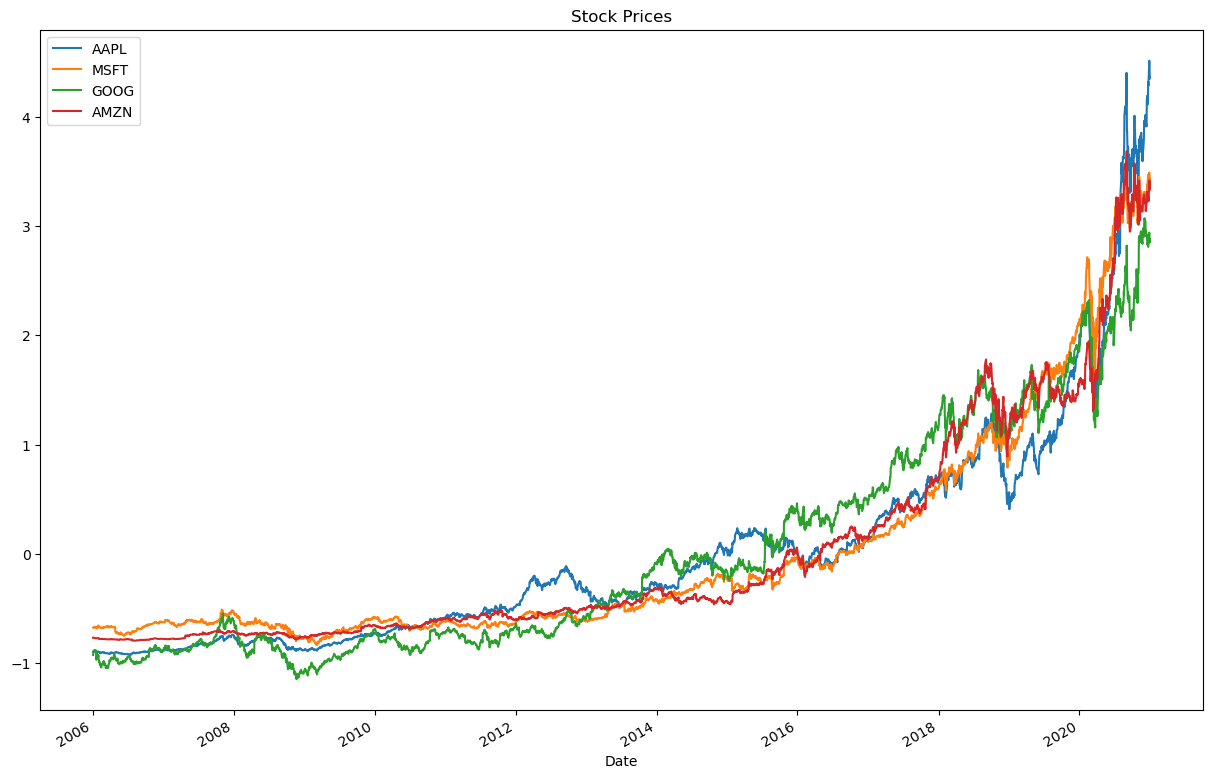

In [44]:
# plot the stock data
stock_data.plot(figsize=(15, 10), title='Stock Prices')


In [31]:
# Define the ticker symbols for the indices
tickers = ['^GSPC', '^GDAXI', '^IXIC']  # SP, DAX, NASDAQ

# Download index data
index_data = yf.download(tickers, start='2006-01-01', end='2021-01-01')

# Print the downloaded data
index_data


[*********************100%***********************]  3 of 3 completed


Adj Close                                    Close  \
                  ^GDAXI        ^GSPC         ^IXIC        ^GDAXI   
Date                                                                
2006-01-02   5449.979980          NaN           NaN   5449.979980   
2006-01-03   5460.680176  1268.800049   2243.739990   5460.680176   
2006-01-04   5523.620117  1273.459961   2263.459961   5523.620117   
2006-01-05   5516.529785  1273.479980   2276.870117   5516.529785   
2006-01-06   5536.319824  1285.449951   2305.620117   5536.319824   
...                  ...          ...           ...           ...   
2020-12-24           NaN  3703.060059  12804.730469           NaN   
2020-12-28  13790.290039  3735.360107  12899.419922  13790.290039   
2020-12-29  13761.379883  3727.040039  12850.219727  13761.379883   
2020-12-30  13718.780273  3732.040039  12870.000000  13718.780273   
2020-12-31           NaN  3756.070068  12888.280273           NaN   

                                               High               \
                  ^GSPC         ^IXIC        ^GDAXI        ^GSPC   
Date                                                               
2006-01-02          NaN           NaN   5451.569824          NaN   
2006-01-03  1268.800049   2243.739990   5496.459961  1270.219971   
2006-01-04  1273.459961   2263.459961   5523.669922  1275.369995   
2006-01-05  1273.479980   2276.870117   5526.410156  1276.910034   
2006-01-06  1285.449951   2305.620117   5537.580078  1286.089966   
...                 ...           ...           ...          ...   
2020-12-24  3703.060059  12804.730469           NaN  3703.820068   
2020-12-28  3735.360107  12899.419922  13818.650391  3740.510010   
2020-12-29  3727.040039  12850.219727  13903.110352  3756.120117   
2020-12-30  3732.040039  12870.000000  13797.089844  3744.629883   
2020-12-31  3756.070068  12888.280273           NaN  3760.199951   

                                   Low                             \
                   ^IXIC        ^GDAXI        ^GSPC         ^IXIC   
Date                                                                
2006-01-02           NaN   5409.279785          NaN           NaN   
2006-01-03   2249.679932   5440.740234  1245.739990   2189.909912   
2006-01-04   2265.280029   5477.600098  1267.739990   2246.070068   
2006-01-05   2277.560059   5502.250000  1270.300049   2264.500000   
2006-01-06   2306.719971   5507.919922  1273.479980   2281.010010   
...                  ...           ...          ...           ...   
2020-12-24  12833.549805           NaN  3689.320068  12767.639648   
2020-12-28  12930.889648  13740.209961  3723.030029  12827.450195   
2020-12-29  12973.330078  13747.080078  3723.310059  12821.959961   
2020-12-30  12924.929688  13717.469727  3730.209961  12857.759766   
2020-12-31  12902.070312           NaN  3726.879883  12821.230469   

                    Open                                  Volume  \
                  ^GDAXI        ^GSPC         ^IXIC       ^GDAXI   
Date                                                               
2006-01-02   5410.240234          NaN           NaN   36148300.0   
2006-01-03   5451.339844  1248.290039   2216.530029  105746000.0   
2006-01-04   5494.459961  1268.800049   2246.959961  108624100.0   
2006-01-05   5521.859863  1273.459961   2264.929932  102413000.0   
2006-01-06   5521.520020  1273.479980   2289.209961   90224400.0   
...                  ...          ...           ...          ...   
2020-12-24           NaN  3694.030029  12791.540039          NaN   
2020-12-28  13779.049805  3723.030029  12914.639648   49250200.0   
2020-12-29  13873.349609  3750.010010  12965.389648   43160200.0   
2020-12-30  13750.990234  3736.189941  12906.509766   28318700.0   
2020-12-31           NaN  3733.270020  12877.089844          NaN   

                                        
                   ^GSPC         ^IXIC  
Date                                    
2006-01-02           NaN           NaN  
2006-01-03 

In [32]:
# create subset of index data where only the adjusted closing price is included
index_data_adj_close = index_data['Adj Close']
index_data_adj_close.head()

,^GDAXI,^GSPC,^IXIC
Date,,,
2006-01-02,5449.979980,NaN,NaN
2006-01-03,5460.680176,1268.800049,2243.739990
2006-01-04,5523.620117,1273.459961,2263.459961
2006-01-05,5516.529785,1273.479980,2276.870117
2006-01-06,5536.319824,1285.449951,2305.620117


In [33]:
# standardize the index data adj close
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale the columns and keep the date index
index_data_scaled = pd.DataFrame(scaler.fit_transform(index_data_adj_close), index=index_data_adj_close.index, columns=index_data_adj_close.columns)
index_data_scaled.head()

,^GDAXI,^GSPC,^IXIC
Date,,,
2006-01-02,-1.247425,NaN,NaN
2006-01-03,-1.243457,-0.840025,-0.884245
2006-01-04,-1.220116,-0.833331,-0.876285
2006-01-05,-1.222745,-0.833303,-0.870872
2006-01-06,-1.215406,-0.816110,-0.859268


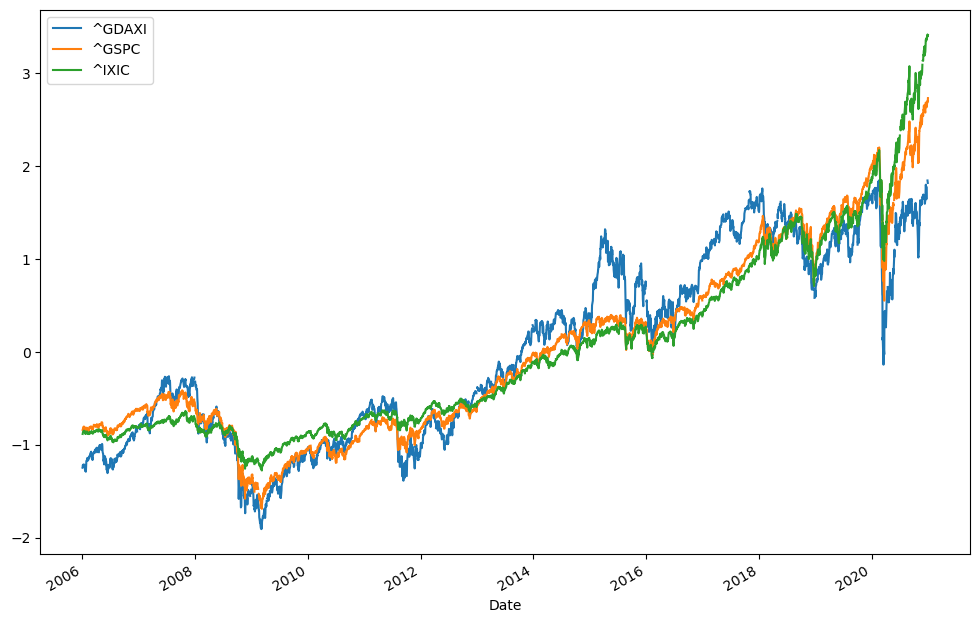

In [34]:
import matplotlib.pyplot as plt
# plot the index data scaled
index_data_scaled.plot(figsize=(12, 8))
plt.show()



In [35]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your FRED API key
# You can obtain your API key by signing up on the FRED website (https://fred.stlouisfed.org/)

"""api_key = '70cf91cb88406a16dfa52aa0a8f88b51'
fred = Fred(api_key=api_key)
"""
import os

os.environ['FRED_API_KEY'] = '70cf91cb88406a16dfa52aa0a8f88b51'


# Access the API key from the environment variable
api_key = os.environ['FRED_API_KEY']

# Create the FRED API object with the API key
fred = Fred(api_key=api_key)

# Specify the series IDs for the economic indicators
unemployment_series_id = 'UNRATE'  # Unemployment rate
gdp_series_id = 'GDP'  # Real GDP (quarterly data)
inflation_series_id = 'CPIAUCSL'  # Consumer Price Index for All Urban Consumers (CPI-U)
interest_rate_series_id = 'FEDFUNDS'  # Effective Federal Funds Rate
money_supply_series_id = 'M2'  # M2 Money Stock

# Download the data for the specified time range
start_date = '2006-01-01'
end_date = '2021-01-01'

unemployment_data = fred.get_series(unemployment_series_id, start_date, end_date)
gdp_data = fred.get_series(gdp_series_id, start_date, end_date)
inflation_data = fred.get_series(inflation_series_id, start_date, end_date)
interest_rate_data = fred.get_series(interest_rate_series_id, start_date, end_date)
money_supply_data = fred.get_series(money_supply_series_id, start_date, end_date)

# Combine the data into a single DataFrame
economic_data = pd.concat([unemployment_data, gdp_data, inflation_data, interest_rate_data, money_supply_data], axis=1)
economic_data.columns = ['unemployment', 'gdp', 'inflation', 'interest_rate', 'money_supply']



In [36]:
# display the first 5 rows of the data
economic_data


,unemployment,gdp,inflation,interest_rate,money_supply
2006-01-01,4.7,13599.16,199.30,4.29,NaN
2006-01-02,NaN,NaN,NaN,NaN,6696.8
2006-01-09,NaN,NaN,NaN,NaN,6714.5
2006-01-16,NaN,NaN,NaN,NaN,6726.9
2006-01-23,NaN,NaN,NaN,NaN,6737.0
...,...,...,...,...,...
2020-12-07,NaN,NaN,NaN,NaN,19089.7
2020-12-14,NaN,NaN,NaN,NaN,19151.6
2020-12-21,NaN,NaN,NaN,NaN,19048.7
2020-12-28,NaN,NaN,NaN,NaN,18938.0


In [39]:
# combine all the data with same time index into one dataframe
all_data = pd.concat([index_data_scaled, economic_data, stock_data], axis=1)
all_data

,^GDAXI,^GSPC,^IXIC,unemployment,gdp,inflation,interest_rate,money_supply,AAPL,MSFT,GOOG,AMZN,FB,TSLA
2006-01-02,-1.247425,NaN,NaN,NaN,NaN,NaN,NaN,6696.8,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,-1.243457,-0.840025,-0.884245,NaN,NaN,NaN,NaN,NaN,-0.895238,-0.674184,-0.924353,-0.766531,NaN,NaN
2006-01-04,-1.220116,-0.833331,-0.876285,NaN,NaN,NaN,NaN,NaN,-0.894965,-0.672271,-0.911999,-0.766953,NaN,NaN
2006-01-05,-1.222745,-0.833303,-0.870872,NaN,NaN,NaN,NaN,NaN,-0.895697,-0.671976,-0.904594,-0.766442,NaN,NaN
2006-01-06,-1.215406,-0.816110,-0.859268,NaN,NaN,NaN,NaN,NaN,-0.893317,-0.673154,-0.886798,-0.766161,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,NaN,NaN,NaN,3.5,NaN,259.248,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,4.4,NaN,258.124,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,8.4,NaN,259.411,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,6.7,NaN,260.813,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# count the number of missing values in each column
all_data.isnull().sum()


^GDAXI            142
^GSPC             166
^IXIC             166
unemployment     3761
gdp              3881
inflation        3761
interest_rate    3761
money_supply     3159
AAPL              166
MSFT              166
GOOG              166
AMZN              166
FB               3942
TSLA             1295
dtype: int64

In [41]:
all_data.to_parquet('src/output/all_data.parquet')

In [1]:
import pandas as pd
import requests


In [2]:
eurostat_url = 'https://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/'
housing_price_index_dataset = 'ei_hpi_q'


In [3]:
def get_eurostat_data(dataset, filter_values):
    url = f'{eurostat_url}{dataset}?{filter_values}'
    response = requests.get(url)
    data = response.json()
    return data


In [4]:
# Define the filter values for the data you want to retrieve
filters = {
    'geo': 'EU',
    'time': '2000-01:2023-01',
}


In [5]:
def parse_eurostat_data(data):
    df = pd.DataFrame(data['value'])
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m')
    df.set_index('time', inplace=True)
    df.columns = ['housing_price_index']
    return df


In [6]:
data = get_eurostat_data(housing_price_index_dataset, '&'.join([f'{k}={v}' for k, v in filters.items()]))
df_housing_price_index = parse_eurostat_data(data)
print(df_housing_price_index.head())

JSONDecodeError: Expecting value: line 39 column 4 (char 44)

# Starting with press releases


In [9]:
import pandas as pd
press_releases = pd.read_csv("src/data/ecb_releases_302.csv")

In [10]:
press_releases

,date,content
0,10 August 2023,10 August 2023\nEuropa Open Air 2023 celebrate...
1,5 July 2023,5 July 2023\nCompared with April 2023:\nconsum...
2,4 July 2023,4 July 2023\nCredit terms and conditions tight...
3,28 June 2023,28 June 2023\nProposed legislation establishes...
4,22 June 2023,22 June 2023\nThe aggregate of total assets of...
...,...,...
297,18 September 1998,The European Central Bank (ECB) will today pub...
298,18 September 1998,The Headquarters Agreement between the Governm...
299,12 September 1998,In accordance with the Resolution adopted by t...
300,12 September 1998,Given that the euro banknotes will be put into...


In [11]:

# Convert date column to datetime format
press_releases['date'] = pd.to_datetime(press_releases['date'], format='%d %B %Y')

# Convert date to "DD-MM-YYYY" format
press_releases['date'] = press_releases['date'].dt.strftime('%d-%m-%Y')

# Remove new line characters, replace with space
press_releases['content'] = press_releases['content'].str.replace('\n', ' ')

press_releases

,date,content
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...
1,05-07-2023,5 July 2023 Compared with April 2023: consumer...
2,04-07-2023,4 July 2023 Credit terms and conditions tighte...
3,28-06-2023,28 June 2023 Proposed legislation establishes ...
4,22-06-2023,22 June 2023 The aggregate of total assets of ...
...,...,...
297,18-09-1998,The European Central Bank (ECB) will today pub...
298,18-09-1998,The Headquarters Agreement between the Governm...
299,12-09-1998,In accordance with the Resolution adopted by t...
300,12-09-1998,Given that the euro banknotes will be put into...


In [41]:
from datetime import datetime

In [39]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')


In [40]:
from functions import split_text
from functions import calculate_sentiment_finbert

2023-08-22 13:01:29.851707: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-22 13:01:32.369118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 13:01:38.720395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [42]:
subset = press_releases
subset[['positive', 'negative']] = subset['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset['neutral'] = 1 - subset['positive'] - subset['negative']

# current time and date
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define the filename with the current date and time
filename = f"src/output/finbert_sentiment_press_releases_{current_datetime}.csv"

# Save the DataFrame to the specified filename
subset.to_csv(filename, index=False)

In [43]:
subset

,date,content,positive,negative,neutral
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...,0.877308,0.108855,0.013838
1,05-07-2023,5 July 2023 Compared with April 2023: consumer...,0.338591,0.079486,0.581922
2,04-07-2023,4 July 2023 Credit terms and conditions tighte...,0.221073,0.190657,0.588270
3,28-06-2023,28 June 2023 Proposed legislation establishes ...,0.723583,0.264521,0.011897
4,22-06-2023,22 June 2023 The aggregate of total assets of ...,0.677040,0.110151,0.212809
...,...,...,...,...,...
297,18-09-1998,The European Central Bank (ECB) will today pub...,0.946169,0.032723,0.021108
298,18-09-1998,The Headquarters Agreement between the Governm...,0.738816,0.248694,0.012490
299,12-09-1998,In accordance with the Resolution adopted by t...,0.877338,0.102010,0.020652
300,12-09-1998,Given that the euro banknotes will be put into...,0.945670,0.025603,0.028728


# Gensim and word2vec

In [25]:
import pandas as pd
from nltk.tokenize import sent_tokenize

# Assuming you have a pandas DataFrame named 'press_releases' with a 'content' column
text_data = press_releases['content'].tolist()

# Tokenize text into sentences
sentences = [sent_tokenize(text) for text in text_data]


In [27]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Create TaggedDocument instances
tagged_data = [TaggedDocument(words=sent, tags=[str(idx)]) for idx, sent in enumerate(sentences)]

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100,  # You can adjust the vector size as needed
                window=5,
                min_count=1,
                workers=4,
                epochs=20)  # Adjust the number of epochs as needed

model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


In [32]:
#  get the document embedding for the first press release
doc_embeddings =[model.dv[idx] for idx in range(len(text_data))]

In [33]:
doc_embeddings

[array([-5.1588458e-03, -6.3521303e-03, -9.3660429e-03,  8.3075846e-03,
         3.5600206e-03,  1.7049775e-05, -1.0000190e-02, -5.5462332e-03,
        -1.0434511e-02,  1.6255225e-03,  2.7012790e-03,  3.8431906e-03,
        -3.6940996e-03, -2.9325904e-03, -3.3228039e-03, -9.4522694e-03,
         3.0263036e-03,  8.3080865e-03, -9.3834000e-03, -3.5014227e-03,
        -4.1699321e-03,  2.7947198e-03, -5.0038951e-03,  2.4473770e-03,
         6.7475373e-03, -8.1697349e-03, -8.6016040e-03, -9.7969044e-03,
         4.6144654e-03, -9.5671639e-03,  6.1459085e-03,  7.7413805e-03,
        -7.0788437e-03, -4.3153050e-03, -6.8440277e-04,  2.1389944e-03,
        -1.7241137e-03, -9.5656151e-03, -3.5802075e-03,  2.0930837e-03,
        -2.1550304e-03, -7.8578433e-03,  3.9576823e-03, -9.1367252e-03,
         3.0599611e-03, -4.7340132e-03,  7.9972073e-05, -1.4874851e-03,
         5.7927128e-03, -7.9255085e-03, -2.3023270e-03, -2.3089060e-04,
        -6.4484891e-03, -6.7517795e-03, -2.6031139e-03,  9.50895

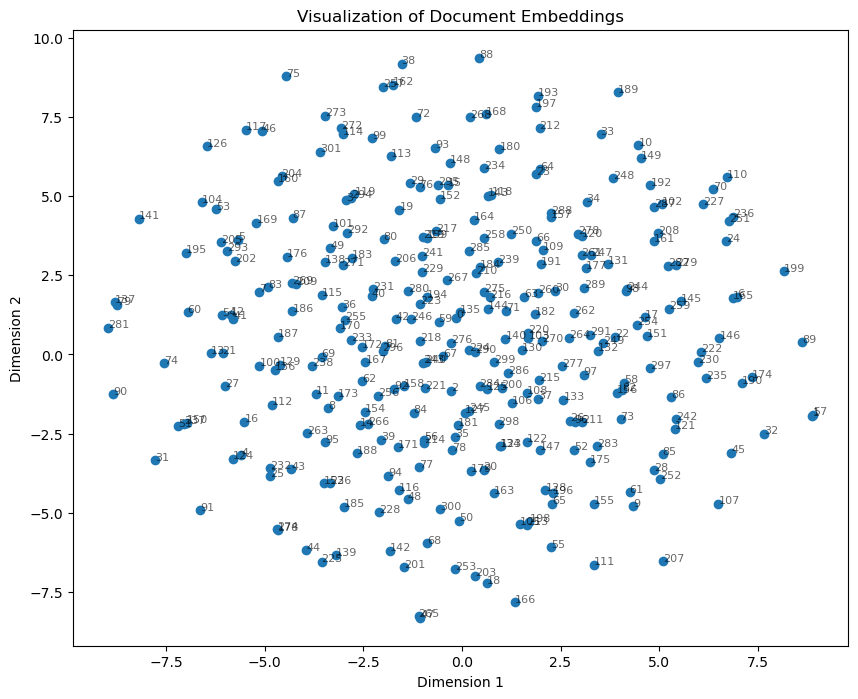

In [35]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert doc_embeddings list into a 2D NumPy array
doc_embeddings_array = np.array(doc_embeddings)

# Calculate pairwise cosine similarity between document embeddings
similarity_matrix = cosine_similarity(doc_embeddings_array)

# Use t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
embedded_docs = tsne.fit_transform(doc_embeddings_array)

# Visualize the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embedded_docs[:, 0], embedded_docs[:, 1], marker='o')

# Annotate points with press release index (0 to len(text_data) - 1)
for i, (x, y) in enumerate(embedded_docs):
    plt.annotate(str(i), (x, y), fontsize=8, alpha=0.6)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualization of Document Embeddings')
plt.show()


# Prepare stock market data

In [1]:
import yfinance as yf
import pandas as pd


In [2]:
import pandas as pd

# Define the path to your data file
data_path = "src/data/stoxx.txt"

# Read the data file into a DataFrame
vstoxx_df = pd.read_csv(data_path, delimiter=";", parse_dates=["Date"], dayfirst=True)

# Change the date format to DD-MM-YYYY
vstoxx_df["Date_merge"] = vstoxx_df["Date"].dt.strftime("%d-%m-%Y")

# Display the DataFrame
print(vstoxx_df.head())


        Date Symbol  Indexvalue  Date_merge
0 1999-01-04   V2TX     18.2033  04-01-1999
1 1999-01-05   V2TX     29.6912  05-01-1999
2 1999-01-06   V2TX     25.1670  06-01-1999
3 1999-01-07   V2TX     32.5205  07-01-1999
4 1999-01-08   V2TX     33.2296  08-01-1999


# Further feature engineering steps

In [3]:
# generate day of the week column
vstoxx_df['day_of_week'] = pd.to_datetime(vstoxx_df['Date']).dt.day_name()
# generate month column
vstoxx_df['month'] = pd.to_datetime(vstoxx_df['Date']).dt.month_name()

vstoxx_df.head()

,Date,Symbol,Indexvalue,Date_merge,day_of_week,month
0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January
1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January
2,1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January
3,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January
4,1999-01-08,V2TX,33.2296,08-01-1999,Friday,January


In [4]:
# changes in market 
# calculate the daily change in the index
vstoxx_df['delta_daily'] = vstoxx_df['Indexvalue'].diff()
vstoxx_df['delta_3d'] = vstoxx_df['Indexvalue'].diff(3)
vstoxx_df['delta_5d'] = vstoxx_df['Indexvalue'].diff(5)
vstoxx_df['delta_30d'] = vstoxx_df['Indexvalue'].diff(30)
vstoxx_df

,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,delta_3d,delta_5d,delta_30d
0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,NaN,NaN,NaN
1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,NaN
2,1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January,-4.5242,NaN,NaN,NaN
3,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January,7.3535,14.3172,NaN,NaN
4,1999-01-08,V2TX,33.2296,08-01-1999,Friday,January,0.7091,3.5384,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6268,2023-08-15,V2TX,18.8579,15-08-2023,Tuesday,August,0.8050,0.7815,-0.6814,4.7564
6269,2023-08-16,V2TX,18.5510,16-08-2023,Wednesday,August,-0.3069,0.1764,-0.4286,3.2565
6270,2023-08-17,V2TX,20.3539,17-08-2023,Thursday,August,1.8029,2.3010,2.2775,1.1262
6271,2023-08-18,V2TX,20.2456,18-08-2023,Friday,August,-0.1083,1.3877,1.8710,2.7082


In [12]:
# Merge the press release dates into the vstoxx_df DataFrame
vstoxx_df = pd.merge(vstoxx_df, press_releases[['date']], how='left', left_on='Date_merge', right_on='date')

# Calculate the percentage change in the index
vstoxx_df['Percentage_Change'] = (vstoxx_df['Indexvalue'] - vstoxx_df['Indexvalue'].shift(1)) / vstoxx_df['Indexvalue'].shift(1)
vstoxx_df

,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,delta_3d,delta_5d,delta_30d,date,Percentage_Change
0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,NaN,NaN,NaN,04-01-1999,NaN
1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,NaN,05-01-1999,0.631089
2,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,NaN,05-01-1999,0.000000
3,1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January,-4.5242,NaN,NaN,NaN,NaN,-0.152375
4,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January,7.3535,14.3172,NaN,NaN,07-01-1999,0.292188
...,...,...,...,...,...,...,...,...,...,...,...,...
6304,2023-08-15,V2TX,18.8579,15-08-2023,Tuesday,August,0.8050,0.7815,-0.6814,4.7564,NaN,0.044591
6305,2023-08-16,V2TX,18.5510,16-08-2023,Wednesday,August,-0.3069,0.1764,-0.4286,3.2565,NaN,-0.016274
6306,2023-08-17,V2TX,20.3539,17-08-2023,Thursday,August,1.8029,2.3010,2.2775,1.1262,NaN,0.097186
6307,2023-08-18,V2TX,20.2456,18-08-2023,Friday,August,-0.1083,1.3877,1.8710,2.7082,NaN,-0.005321


In [13]:
vstoxx_df.describe()

,Date,Indexvalue,delta_daily,delta_3d,delta_5d,delta_30d,Percentage_Change
count,6309,6309.000000,6308.000000,6305.000000,6303.000000,6278.000000,6308.000000
mean,2011-05-02 04:27:30.213980160,23.775130,0.000818,-0.004982,-0.009695,-0.103549,0.002070
min,1999-01-04 00:00:00,10.678300,-13.987300,-31.328600,-27.666400,-54.900100,-0.352551
25%,2005-02-23 00:00:00,17.343000,-0.796775,-1.353500,-1.731750,-3.537050,-0.036092
50%,2011-05-04 00:00:00,21.881700,-0.098550,-0.139900,-0.182100,-0.628650,-0.004810
75%,2017-07-13 00:00:00,27.330300,0.658800,1.183000,1.444400,2.542225,0.031108
max,2023-08-21 00:00:00,87.512700,22.641500,31.859100,39.871200,71.191700,0.631089
std,NaN,9.357963,1.818416,2.987419,3.689833,7.318153,0.065727


# Bond prices

In [30]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the Eurozone bond you're interested in
bond_ticker = ["DAX"]

# Define the start and end dates for the data you want to fetch
start_date = "2000-01-01"
end_date = "2023-08-01"

# Fetch the bond price data using yfinance
bond_data = yf.download(bond_ticker, start=start_date, end=end_date)

# remove the 1st row for Date, and keep it in 0th row
bond_data.reset_index(inplace=True)


# Display the downloaded data
bond_data 

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-23,25.090000,25.270000,25.090000,25.250000,20.524282,7400
1,2014-10-24,25.139999,25.190001,25.139999,25.190001,20.475508,15200
2,2014-10-27,25.028000,25.028000,25.028000,25.028000,20.343826,300
3,2014-10-28,25.440001,25.510000,25.440001,25.510000,20.735619,3800
4,2014-10-29,25.660000,25.670000,25.660000,25.670000,20.865673,13600
...,...,...,...,...,...,...,...
2201,2023-07-25,29.990000,30.100000,29.930000,30.100000,30.100000,14600
2202,2023-07-26,29.709999,30.080000,29.709999,30.080000,30.080000,1900
2203,2023-07-27,30.280001,30.329000,30.000000,30.000000,30.000000,10800
2204,2023-07-28,30.270000,30.520000,30.270000,30.490000,30.490000,4500


In [31]:
bond_data = bond_data[['Date','Adj Close']]
bond_data.columns = ['Date', 'bond_price']
bond_data['b_delta_daily'] = bond_data['bond_price'].diff()
bond_data['b_delta_3d'] = bond_data['bond_price'].diff(3)
bond_data['b_delta_5d'] = bond_data['bond_price'].diff(5)
bond_data['b_delta_30d'] = bond_data['bond_price'].diff(30)
bond_data

/tmp/ipykernel_11076/622362221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_data['b_delta_daily'] = bond_data['bond_price'].diff()
/tmp/ipykernel_11076/622362221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_data['b_delta_3d'] = bond_data['bond_price'].diff(3)
/tmp/ipykernel_11076/622362221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Date,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d
0,2014-10-23,20.524282,NaN,NaN,NaN,NaN
1,2014-10-24,20.475508,-0.048775,NaN,NaN,NaN
2,2014-10-27,20.343826,-0.131681,NaN,NaN,NaN
3,2014-10-28,20.735619,0.391792,0.211336,NaN,NaN
4,2014-10-29,20.865673,0.130054,0.390165,NaN,NaN
...,...,...,...,...,...,...
2201,2023-07-25,30.100000,0.130001,-0.049999,-0.309999,1.268011
2202,2023-07-26,30.080000,-0.020000,-0.070000,-0.240000,0.866453
2203,2023-07-27,30.000000,-0.080000,0.030001,-0.150000,0.590784
2204,2023-07-28,30.490000,0.490000,0.389999,0.340000,0.982948


# Import FinBERT sentiments


In [32]:
finbert_releases = pd.read_csv("src/output/finbert_sentiment_press_releases_2023-08-22_13-22-32.csv")
finbert_releases

,date,content,positive,negative,neutral
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...,0.877308,0.108855,0.013838
1,05-07-2023,5 July 2023 Compared with April 2023: consumer...,0.338591,0.079486,0.581922
2,04-07-2023,4 July 2023 Credit terms and conditions tighte...,0.221073,0.190657,0.588270
3,28-06-2023,28 June 2023 Proposed legislation establishes ...,0.723583,0.264521,0.011897
4,22-06-2023,22 June 2023 The aggregate of total assets of ...,0.677040,0.110151,0.212809
...,...,...,...,...,...
297,18-09-1998,The European Central Bank (ECB) will today pub...,0.946169,0.032723,0.021108
298,18-09-1998,The Headquarters Agreement between the Governm...,0.738816,0.248694,0.012490
299,12-09-1998,In accordance with the Resolution adopted by t...,0.877338,0.102010,0.020652
300,12-09-1998,Given that the euro banknotes will be put into...,0.945670,0.025603,0.028728


In [33]:
# change the date format to YYYY-MM-DD
finbert_releases['date'] = pd.to_datetime(finbert_releases['date'], format='%d-%m-%Y')

# merge the finbert releases with the bond data
finbert_releases = pd.merge(finbert_releases, bond_data, how='left', left_on='date', right_on='Date')

In [34]:
finbert_releases

,date,content,positive,negative,neutral,Date,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d
0,2023-08-10,10 August 2023 Europa Open Air 2023 celebrates...,0.877308,0.108855,0.013838,NaT,NaN,NaN,NaN,NaN,NaN
1,2023-07-05,5 July 2023 Compared with April 2023: consumer...,0.338591,0.079486,0.581922,2023-07-05,29.059999,-0.465000,-0.130001,-0.124197,-0.515537
2,2023-07-04,4 July 2023 Credit terms and conditions tighte...,0.221073,0.190657,0.588270,NaT,NaN,NaN,NaN,NaN,NaN
3,2023-06-28,28 June 2023 Proposed legislation establishes ...,0.723583,0.264521,0.011897,2023-06-28,29.419001,0.234804,0.371773,-0.088051,0.264156
4,2023-06-22,22 June 2023 The aggregate of total assets of ...,0.677040,0.110151,0.212809,2023-06-22,29.487484,-0.019567,-0.596794,-0.019567,0.127184
...,...,...,...,...,...,...,...,...,...,...,...
297,1998-09-18,The European Central Bank (ECB) will today pub...,0.946169,0.032723,0.021108,NaT,NaN,NaN,NaN,NaN,NaN
298,1998-09-18,The Headquarters Agreement between the Governm...,0.738816,0.248694,0.012490,NaT,NaN,NaN,NaN,NaN,NaN
299,1998-09-12,In accordance with the Resolution adopted by t...,0.877338,0.102010,0.020652,NaT,NaN,NaN,NaN,NaN,NaN
300,1998-09-12,Given that the euro banknotes will be put into...,0.945670,0.025603,0.028728,NaT,NaN,NaN,NaN,NaN,NaN


In [36]:
# Merge the press release dates into the vstoxx_df DataFrame
finbert_releases = pd.concat([finbert_releases, vstoxx_df[['Percentage_Change', 'delta_daily', 'delta_3d', 'delta_5d', 'delta_30d']]], axis=1)

In [37]:
finbert_releases

,date,content,positive,negative,neutral,Date,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,Percentage_Change,delta_daily,delta_3d,delta_5d,delta_30d
0,2023-08-10,10 August 2023 Europa Open Air 2023 celebrates...,0.877308,0.108855,0.013838,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-05,5 July 2023 Compared with April 2023: consumer...,0.338591,0.079486,0.581922,2023-07-05,29.059999,-0.465000,-0.130001,-0.124197,-0.515537,0.631089,11.4879,NaN,NaN,NaN
2,2023-07-04,4 July 2023 Credit terms and conditions tighte...,0.221073,0.190657,0.588270,NaT,NaN,NaN,NaN,NaN,NaN,0.000000,11.4879,NaN,NaN,NaN
3,2023-06-28,28 June 2023 Proposed legislation establishes ...,0.723583,0.264521,0.011897,2023-06-28,29.419001,0.234804,0.371773,-0.088051,0.264156,-0.152375,-4.5242,NaN,NaN,NaN
4,2023-06-22,22 June 2023 The aggregate of total assets of ...,0.677040,0.110151,0.212809,2023-06-22,29.487484,-0.019567,-0.596794,-0.019567,0.127184,0.292188,7.3535,14.3172,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.044591,0.8050,0.7815,-0.6814,4.7564
6305,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-0.016274,-0.3069,0.1764,-0.4286,3.2565
6306,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.097186,1.8029,2.3010,2.2775,1.1262
6307,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-0.005321,-0.1083,1.3877,1.8710,2.7082


In [38]:
# data with no nans
restricted_sample = finbert_releases.dropna()
restricted_sample

,date,content,positive,negative,neutral,Date,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,Percentage_Change,delta_daily,delta_3d,delta_5d,delta_30d
31,2023-03-16,16 March 2023 Inflation is projected to remain...,0.312847,0.210771,0.476381,2023-03-16,26.982906,0.489174,-0.078268,-0.743547,-1.320774,0.044535,1.6061,-2.6344,-1.0956,19.4663
32,2023-03-07,7 March 2023 Compared with December 2022: cons...,0.353250,0.061813,0.584937,2023-03-07,27.667753,-0.489176,0.107618,0.205454,-0.097834,-0.043964,-1.6561,-1.8174,-3.5374,6.3223
33,2023-02-23,23 February 2023 ECB profit zero in 2022 (2021...,0.296436,0.348067,0.355497,2023-02-23,27.834072,0.225021,-0.185886,-0.280787,0.988132,0.018668,0.6723,0.6223,-3.6182,11.5188
34,2023-02-17,"Friday, 17 February 2023 Myriam Moufakkir has ...",0.924712,0.037320,0.037968,2023-02-17,28.019958,0.019566,-0.009783,0.361988,2.289341,-0.030606,-1.1228,-2.1066,-2.2679,3.0425
35,2023-02-09,9 February 2023 Total assets of EU-headquarter...,0.712124,0.034825,0.253050,2023-02-09,27.980825,0.058701,0.156536,-0.616360,2.878521,-0.046360,-1.6487,-2.0992,-2.1492,0.6847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021-01-22,"22 January 2021 460,000 counterfeit euro bankn...",0.523364,0.045902,0.430734,2021-01-22,28.960697,-0.064819,0.134272,-0.185202,1.395662,0.000840,0.0234,0.9619,0.7450,2.0564
200,2021-01-21,21 January 2021 The Governing Council decided ...,0.573991,0.412283,0.013726,2021-01-21,29.025517,0.106489,0.565788,-0.030558,1.414766,-0.045970,-1.2812,-1.2595,0.2866,1.9607
201,2021-01-19,19 January 2021 Credit standards tightened for...,0.296683,0.200776,0.502540,2021-01-19,28.826426,0.366697,-0.229649,-0.166681,1.261391,-0.010290,-0.2736,-1.5314,-0.5929,1.3279
202,2021-01-13,"13 January 2021 Over 8,000 responses received ...",0.791404,0.194346,0.014250,2021-01-13,29.056074,-0.094452,-0.463926,-0.223167,1.914341,-0.039478,-1.0389,-2.5937,-2.5720,2.2096


In [40]:
# run olx regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the regression formula
formula = "delta_daily + negative + delta_3d + delta_5d + delta_30d + b_delta_daily + b_delta_3d + b_delta_5d + b_delta_30d"

# Fit the regression
model = smf.ols(formula=formula, data=restricted_sample).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.390
Date:                Tue, 22 Aug 2023   Prob (F-statistic):              0.206
Time:                        23:07:19   Log-Likelihood:                 88.691
No. Observations:                 149   AIC:                            -159.4
Df Residuals:                     140   BIC:                            -132.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1969      0.012     16.569

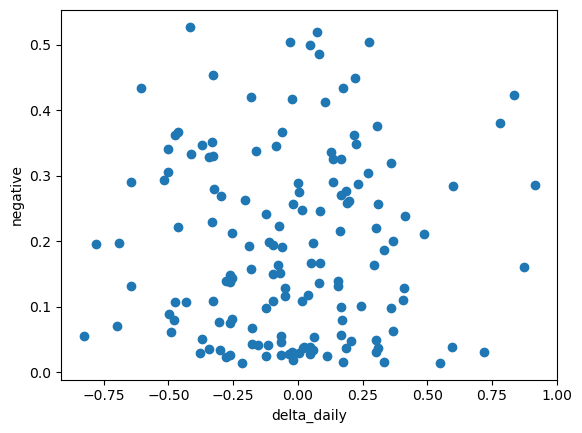

In [44]:
# plot negative versus delta_daily
import matplotlib.pyplot as plt
plt.scatter(restricted_sample['b_delta_daily'], restricted_sample['negative'])
plt.xlabel('delta_daily')
plt.ylabel('negative')
plt.show()
